In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import TruncatedSVD

In [97]:
df = pd.read_csv('../creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [98]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df = df.sample(frac=1)  #shuffle

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
196656,-0.293440,0.551393,2.071621,0.087508,-1.215261,0.358478,0.040046,-1.306700,0.303083,-0.470686,...,-0.154362,0.276140,1.038231,-0.015632,0.123566,0.301044,-0.109135,-0.006750,-0.054436,0
123301,-0.293440,-0.091824,-1.298359,1.079671,-0.180678,1.287839,1.858273,-2.223695,0.525167,-0.096874,...,-0.187572,-0.332983,-0.851270,-0.370800,0.298242,0.442930,-0.522832,0.000105,0.135698,1
35759,0.649200,-0.545624,0.995305,-0.188769,1.183485,2.694444,-0.303485,1.631109,-0.679255,0.447741,...,0.030999,-0.286384,-0.548466,-0.185829,-0.807710,0.537608,-0.013373,0.047613,0.023446,0
150680,1.146231,0.107931,-12.833631,7.508790,-20.491952,7.465780,-11.575304,-5.140999,-14.020564,8.332120,...,-1.378923,2.966842,0.615344,-0.766495,0.431261,-0.104975,-0.010091,-2.400811,-0.720557,1
58761,-0.293440,-0.424805,1.243848,0.524526,-0.538884,1.209196,0.479538,-0.197429,0.049166,0.037792,...,-0.171541,-0.051660,-0.084089,-0.192846,-0.917392,0.681953,-0.194419,0.045917,0.040136,1


In [99]:
mat_df = np.array(new_df).astype(np.float64)

U, s, V = np.linalg.svd(mat_df, full_matrices=True)
U.shape, s.shape, V.shape

((984, 984), (31,), (31, 31))

In [100]:
s

array([546.71535037, 180.98488912, 155.82324585, 123.71097724,
       108.47800209, 100.05173907,  61.20269566,  50.70554255,
        47.1008715 ,  43.5185096 ,  40.08360408,  37.084162  ,
        36.49280435,  34.37141063,  32.69449595,  31.57430724,
        30.44488909,  29.26489936,  27.34874346,  26.54278363,
        23.07538423,  22.35493622,  20.27577803,  19.54391569,
        18.12934401,  15.99912347,  13.57014014,  12.85392655,
        11.1154878 ,   9.64194761,   9.46866819])

## TruncatedSVD

In [89]:
svd = TruncatedSVD(n_components=6)
svd.fit(mat_df)

TruncatedSVD(n_components=6)

In [90]:
svd.singular_values_

array([546.7486833 , 182.0239549 , 157.10117573, 142.41527601,
       110.00191621, 102.26966721])

In [91]:
svd.explained_variance_ratio_

array([0.63372218, 0.09585633, 0.0721233 , 0.05866252, 0.03506028,
       0.03125607])

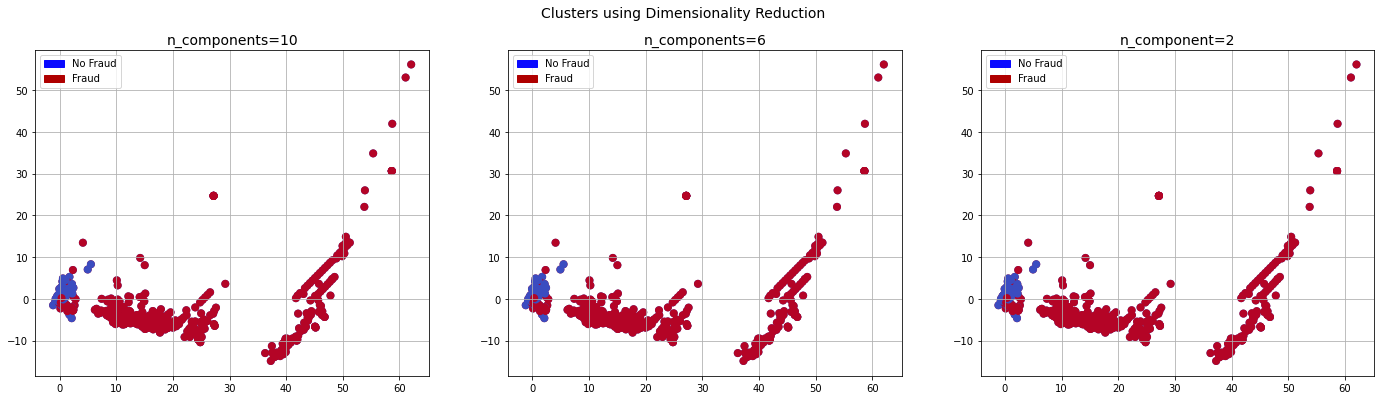

In [110]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# svd by num
y = new_df['Class']
svd10 = TruncatedSVD(n_components=10, algorithm='randomized', random_state=42).fit_transform(mat_df)
svd6 = TruncatedSVD(n_components=6, algorithm='randomized', random_state=42).fit_transform(mat_df)
svd2 = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(mat_df)


# n_components = 10
ax1.scatter(svd10[:,0], svd10[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(svd10[:,0], svd10[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('n_components=10', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])


# n_components = 6
ax2.scatter(svd6[:,0], svd6[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(svd6[:,0], svd6[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('n_components=6', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])


# n_components = 2
ax3.scatter(svd2[:,0], svd2[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(svd2[:,0], svd2[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('n_components=2', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()